<small>*__contexto del proyecto:__ trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.*</small>


## Introducción del Proyecto

En el competitivo mundo de la venta de videojuegos, las preferencias de los consumidores cambian rápidamente y la cantidad de competidores es alta. Por ello, la capacidad de analizar y predecir el éxito de un juego se vuelve crucial para las empresas del sector. En este contexto, nuestro proyecto se enmarca en las operaciones de la tienda Ice, especializada en la venta de videojuegos a nivel mundial.

Nuestro objetivo principal es utilizar datos disponibles sobre reseñas de usuarios y expertos, así como información sobre géneros, plataformas y ventas históricas, para planificar de manera efectiva las campañas publicitarias de Ice para 2017. A través de la identificación de patrones, buscamos facilitar la toma de decisiones y estimar el potencial de éxito de diversos juegos en el mercado. Es fundamental comprender los factores que determinan el éxito de un videojuego y cómo estos pueden influir en las estrategias de marketing y desarrollo.


## Preparación de los datos


### Carga de librerías y archivos

In [1]:
import math as mt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

games = pd.read_csv('/datasets/games.csv')



### Preparación y estudio general de los datos

In [2]:
#información general del df
games.info()
print()
#revisión de filas duplicadas
print(games.duplicated().sum())
#revisión valores ausentes 
print(games.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

0
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         670

In [3]:
#revisión de las primeras filas del df
print(games.head())


                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [4]:
#se revisan valores unicos de las columnas para revisar si estan bien categorizados sus tipos de datos 

print(games["Rating"].unique())
print(games['User_Score'].unique())
print(games['Critic_Score'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


#### Correción de nombre de  columnas y tipos de datos

In [5]:
#poner los nombres de las columnas en minúsculas 
games.columns = games.columns.str.lower()
#cambiar los tipos de datos
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')
#se cambia user_score a float y a la ve se remplaza valor tbd a nan para poder generar el cambio
games['user_score'] = games['user_score'].replace('tbd', 'nan').astype('float64')


In [6]:
#se completan valores de year of release según el lanzamiento en otras plataformas
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('name')['year_of_release'].transform('first'))

print(games['year_of_release'].isna().sum())


146


Descripción de cambios en columnas:
- year_of_release: Cambié de float64 a Int64 para reflejar que representa un año, ya que este no puede ser decimal.

- critic_score: Cambié a Int64 para reflejar que es una puntuación entera.

- user_score: Cambié de object a float64, manejando 'TBD' como NaN ya que es información no disponible y en su estado actual no iba a dejar la transición a decimal ya que es un string.


Decidí no rellenar los valores ausentes en el dataframe. Aunque las columnas "critic_score", "user_score" y "rating" presentan un número considerable de valores faltantes, estas ausencias pueden deberse a diversas razones, como el hecho de que algunos juegos fueron lanzados en años en los que no se registró puntuación, o la falta de interés en evaluar ciertos títulos. Dado que estas columnas se utilizarán en análisis posteriores, prefiero mantener la integridad de los datos para evitar suposiciones erróneas. Rellenar con promedios, sin tener en cuenta que el dataframe puede contener datos atípicos, podría llevar a conclusiones incorrectas.

#### Enriquecimiento de datos

In [7]:
# calculo de columna de ventas totales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] 

In [8]:
# Se calcula mediana para critic score y user score
median_critic = games['critic_score'].median()
median_user = games['user_score'].median()

#se reemplazan los valores nulos con las medianas
games['critic_score'] = games['critic_score'].fillna(median_critic)
games['user_score'] = games['user_score'].fillna(median_user)



## Análisis de los datos


El análisis comenzará evaluando la cantidad de juegos lanzados anualmente para observar la variación en los lanzamientos entre las diferentes plataformas. Además, se examinará la distribución de las ventas a lo largo de los años, seleccionando las plataformas con mayores ventas para entender mejor la duración de sus ciclos de vida. Con la información recopilada, se determinará desde qué año se filtrarán los datos para obtener un dataframe útil que permita generar una proyección para 2017 y seleccionar las plataformas que probablemente serán más rentables durante ese período.

### Juegos lanzados por año

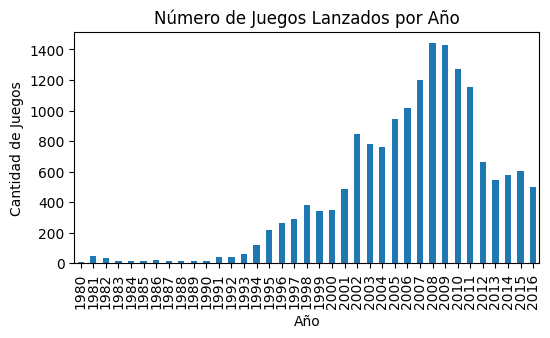

In [9]:
#juegos lanzados por año 
games['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(6, 3))
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.show()

Al observar la cantidad de los juegos lanzados a través del tiempo notamos que desde el 2002 se genera un aumento notorio de lanzamientos por lo que se tomaran los datos desde ese año en adelante, si bien nuestro objetivo es proyectar y para eso necesitamos los datos más recientes, por ahora se filtrara desde esa fecha para poder observar mejor los comportamientos y ciclos de vida de las plataformas.   


In [10]:
#se genera nuevo df filtrado
games_2002 = games[games['year_of_release'] > 2001]


### Variación de las ventas por plataforma

Con los datos ya filtrados se procede a observar la variación de ventas de una plataforma a otra, esto se hara agrupando las ventas por plataforma.  

In [11]:
#ventas por plataforma 
platform_sales = games_2002.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales)

platform
PS2     1040.61
X360     966.61
PS3      934.71
Wii      903.31
DS       804.26
PS4      314.14
PSP      293.57
3DS      258.51
GBA      252.13
XB       231.88
PC       198.69
GC       172.04
XOne     159.32
WiiU      82.19
PSV       53.81
PS         8.74
N64        0.41
DC         0.35
Name: total_sales, dtype: float64


Para comprender mejor el ciclo de vida de los juegos, se grafican las ventas totales por año en columnas agrupadas por plataforma. Aunque el gráfico puede no ser tan intuitivo, los colores que distinguen las distintas plataformas permiten observar que varias de ellas tienen un ciclo de vida aproximado de entre 8 y 10 años. Para analizar este comportamiento con mayor claridad, se volverá a graficar, pero esta vez utilizando únicamente los datos de las cinco plataformas con mayores ventas totales, que son: PS2, X360, PS3, Wii y DS.

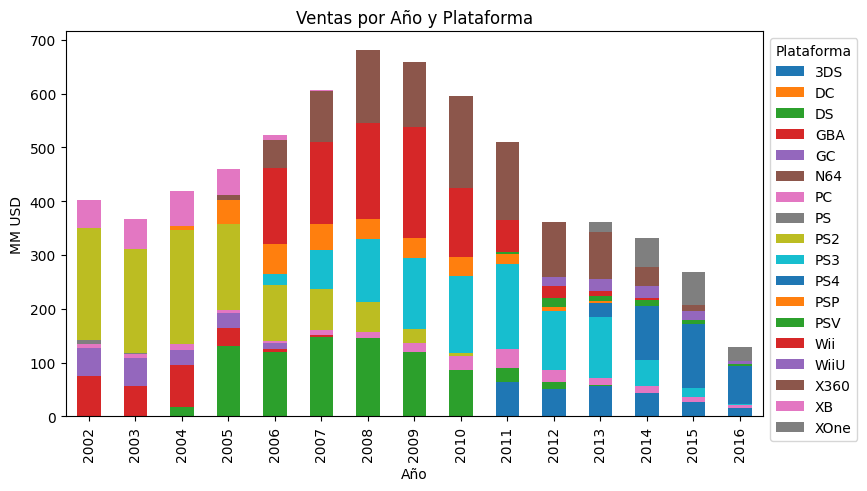

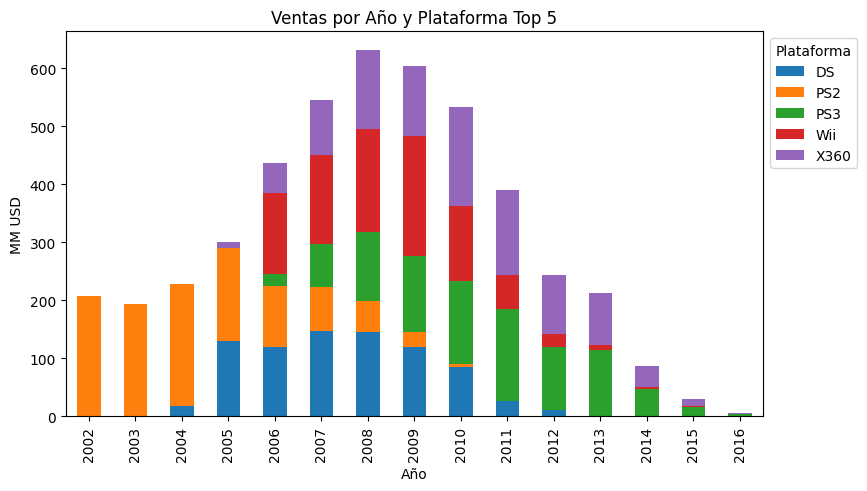

In [12]:
#ventas anuales agrupadas por plataforma 
games_plat = games_2002.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
games_plat.plot(kind='bar', stacked=True, figsize=(9, 5))
plt.title('Ventas por Año y Plataforma')
plt.xlabel('Año')
plt.ylabel('MM USD')
plt.legend(title='Plataforma', bbox_to_anchor=(1, 1), loc='upper left')  
plt.show()

#ventas anuales de las 5 plataformas con mayor venta 
top5_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
topgames_2002 = games_2002[games_2002['platform'].isin(top5_platforms)]
top5 = topgames_2002.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
top5.plot(kind='bar', stacked=True, figsize=(9, 5))
plt.title('Ventas por Año y Plataforma Top 5')
plt.xlabel('Año')
plt.ylabel('MM USD')
plt.legend(title='Plataforma', bbox_to_anchor=(1, 1), loc='upper left')  
plt.show()

Al observar el gráfico de las cinco principales plataformas, se confirma que el ciclo de vida de una plataforma tiene una duración aproximada de 10 años. Sin embargo, es importante destacar que, aunque estas son las plataformas más populares en el dataframe, en 2016 ya no generan ventas.

Esto indica que los períodos que estamos analizando no reflejan adecuadamente las preferencias actuales. Por lo tanto, se filtrarán nuevamente los datos para centrarnos únicamente en el período desde 2012 en adelante, ya que a partir de ese año se observa un comportamiento consistente en cuanto a la cantidad de juegos lanzados y se incluye información sobre las plataformas más relevantes del sector.

### Determinación de fecha para análisis posteriores

Una vez establecida la fecha de corte para el nuevo dataframe, generaremos nuevamente el listado de ventas por plataforma y un gráfico de barras agrupadas para comprender mejor este nuevo conjunto de datos.

platform
PS4     314.14
PS3     289.71
X360    237.52
3DS     195.01
XOne    159.32
WiiU     82.19
PC       63.51
PSV      49.18
Wii      36.60
DS       13.21
PSP      11.69
Name: total_sales, dtype: float64


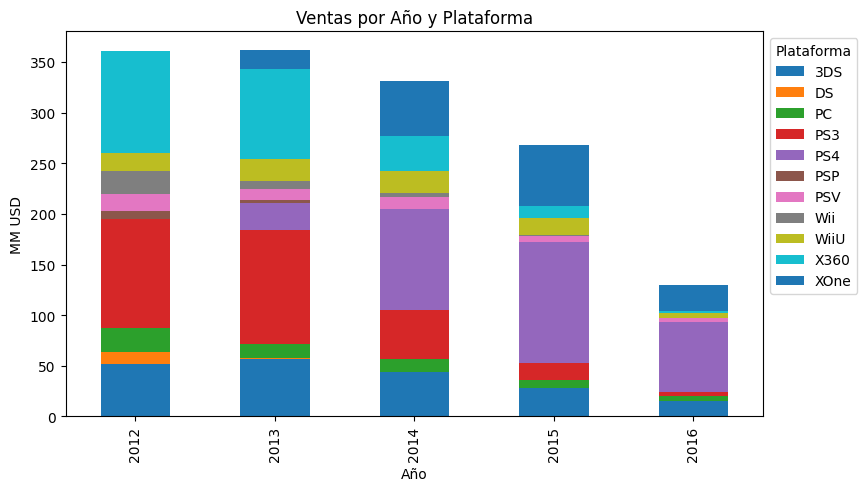

In [13]:
#se genera nuevo df fitrado para tener datos del 2012 en adelante
games_2012 = games[games['year_of_release'] > 2011]
games_2012 = games_2012.reset_index(drop=True)
#ventas por plataforma desde 2012 en adelante
new_platform_sales = games_2012.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(new_platform_sales)

#ventas anuales desde el 2012 en adelante agrupadas por plataforma 
new_games_plat = games_2012.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
new_games_plat.plot(kind='bar', stacked=True, figsize=(9, 5))
plt.title('Ventas por Año y Plataforma')
plt.xlabel('Año')
plt.ylabel('MM USD')
plt.legend(title='Plataforma', bbox_to_anchor=(1, 1), loc='upper left')  
plt.show()

En el top 3 de ventas, encontramos a PS3, PS4 y X360. Sin embargo, el gráfico indica que tanto PS3 como X360 ya no generan ventas en el período más reciente.
Es importante destacar que, aunque parece que ninguna plataforma creció en 2016, esto podría no reflejar una caída real en las ventas, sino más bien la posibilidad de que no se dispone de toda la información de ventas de ese año (esto se indica como una posibilidad en la descripción de los datos del proyecto), sin embargo, como vimos en gráficos anteriores y teniendo en cuenta la duración aproximada de los ciclos de vida de plataformas, es probable que las plataformas más antiguas (PS3, X360) efectivamente ya esten en fase de declive. Por otro lado, las plataformas PS4, XOne y 3DS continúan mostrando ciclos de vida en crecimiento, lo que las posiciona como opciones potencialmente rentables.

### Diagrama de caja

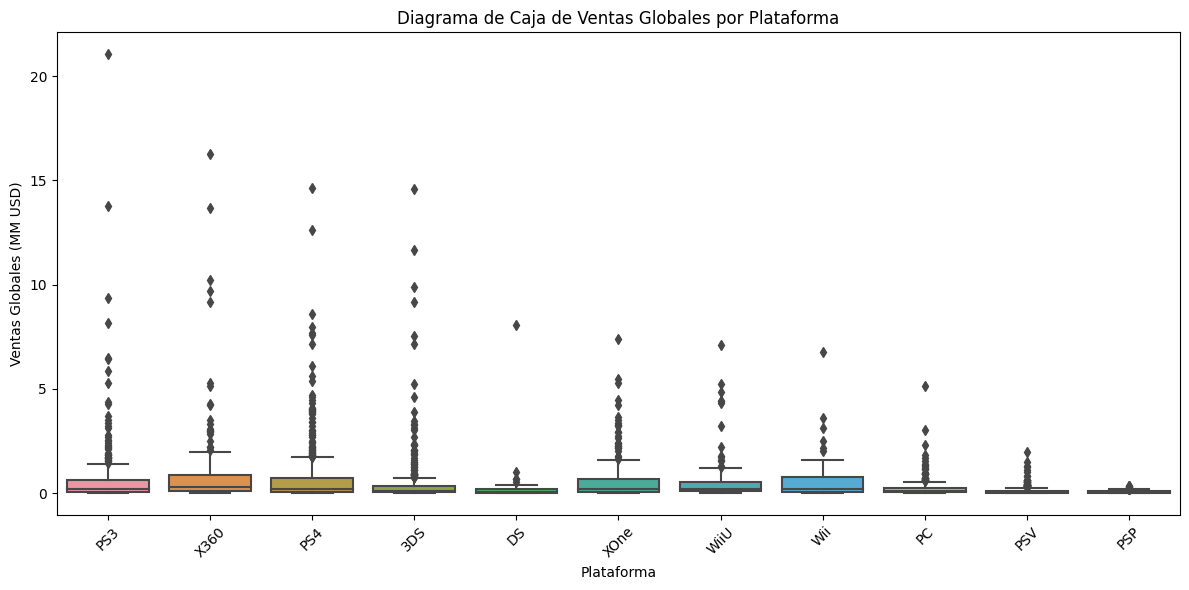

             sum  count      mean  median
platform                                 
PS4       314.14    392  0.801378    0.20
PS3       289.71    494  0.586457    0.20
X360      237.52    294  0.807891    0.31
3DS       195.01    397  0.491209    0.11
XOne      159.32    247  0.645020    0.22
WiiU       82.19    147  0.559116    0.22
PC         63.51    255  0.249059    0.08
PSV        49.18    411  0.119659    0.05
Wii        36.60     55  0.665455    0.18
DS         13.21     32  0.412812    0.05
PSP        11.69    175  0.066800    0.04


In [14]:
# Creación del diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=games_2012)
plt.title('Diagrama de Caja de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (MM USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ventas_estadisticas = games_2012.groupby('platform')['total_sales'].agg(['sum', 'count','mean', 'median']).sort_values(by='sum', ascending=False)
print(ventas_estadisticas)

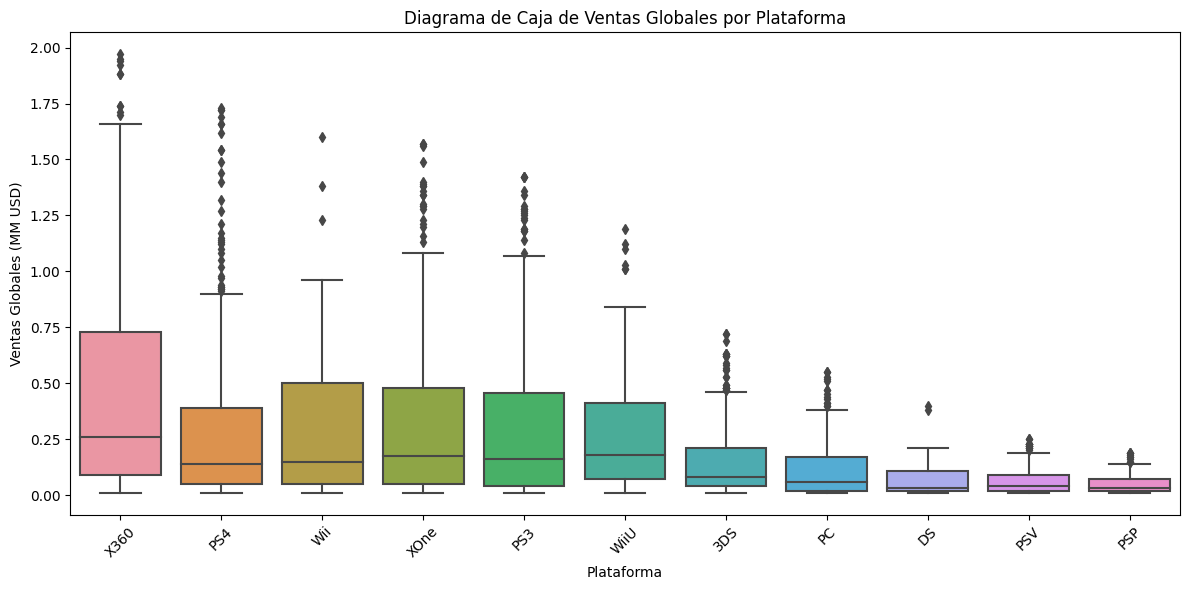

In [17]:
# Calcular límites para valores atípicos
Q1 = games_2012.groupby('platform')['total_sales'].transform(lambda x: x.quantile(0.25))
Q3 = games_2012.groupby('platform')['total_sales'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

minimo = Q1 - 1.5 * IQR
maximo = Q3 + 1.5 * IQR

#generar df filtrado
games_2012_filtered = games_2012[(games_2012['total_sales'] >= minimo) & (games_2012['total_sales'] <= maximo)]

# Ver resultados
# Creación del diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=games_2012_filtered)
plt.title('Diagrama de Caja de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (MM USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Al analizar el diagrama de caja, se observa que muchas plataformas presentan valores atípicos, lo que indica una alta variabilidad en las ventas. Estos valores atípicos reflejan juegos con ventas extraordinarias. Por ejemplo, en el caso de PS3, se identifica un juego que generó más de 20 millones de dólares en ventas globales, mientras que tanto la media como la mediana de la plataforma son inferiores al millón de dólares.

Al comparar la media y la mediana de cada plataforma, se observa que la primera es más alta debido a estos valores atípicos, lo que corrobora el gran impacto que generan algunos juegos en las ventas generales. Por ello, es crucial que las estrategias de marketing se enfoquen en la composición de juegos que se presentan en las plataformas exitosas. Además, se debería investigar si hay correlaciones o características comunes entre los juegos que componen los datos atípicos  ya que esto podría aportar en el proceso de planificación de estrategias de desarrollo para 2017.


### Relación de las ventas con las reseñas

Para analizar cómo las reseñas de usuarios y críticos impactan las ventas de una plataforma popular, seleccionaremos la PS4, filtrando únicamente las filas correspondientes a esta. A continuación, se creará un gráfico de dispersión para visualizar la relación entre las reseñas (uno para las de críticos y otro para las de usuarios) y las ventas. Además, se calculará la correlación de las columnas del df con la columna total_sales.

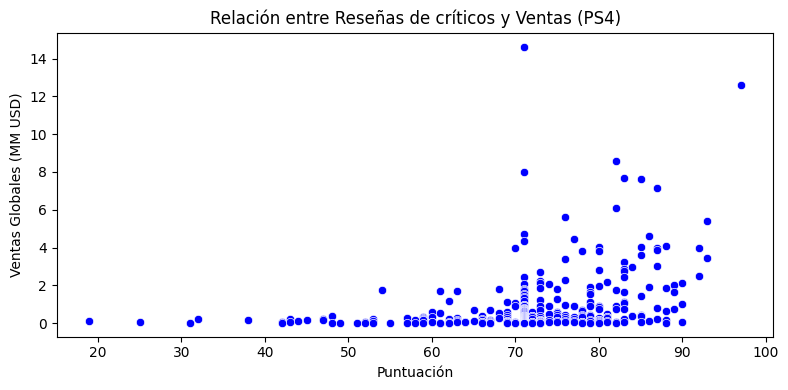

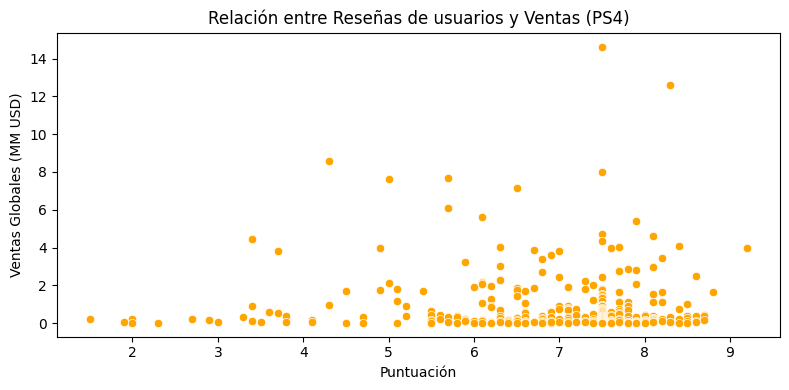

year_of_release   -0.235032
na_sales           0.928160
eu_sales           0.958157
jp_sales           0.527129
other_sales        0.998051
critic_score       0.338706
user_score        -0.062756
total_sales        1.000000
Name: total_sales, dtype: float64


In [18]:
games_PS4 = games_2012[games_2012['platform'] == 'PS4']

# Crear el gráfico de dispersión de critic_score
plt.figure(figsize=(8, 4))
sns.scatterplot(x='critic_score', y='total_sales', data=games_PS4, color='blue')
plt.title('Relación entre Reseñas de críticos y Ventas (PS4)')
plt.xlabel('Puntuación')
plt.ylabel('Ventas Globales (MM USD)')
plt.tight_layout()
plt.show()


# Crear el gráfico de dispersión de user_score
plt.figure(figsize=(8, 4))
sns.scatterplot(x='user_score', y='total_sales', data=games_PS4, color='orange')
plt.title('Relación entre Reseñas de usuarios y Ventas (PS4)')
plt.xlabel('Puntuación')
plt.ylabel('Ventas Globales (MM USD)')
plt.tight_layout()
plt.show()

#ver correlación de las columnas con total_sales
print(games_PS4.corr()['total_sales'])

Con base en el análisis de correlaciones generado para PS4, vemos que las reseñas de los críticos muestran una correlación moderadamente positiva con las ventas totales (0.406568), esto sugiere que a medida que aumenta la puntuación de los críticos, generalmente también tienden a incrementarse las ventas de los juegos. Por otro lado, la correlación entre las reseñas de los usuarios y las ventas es prácticamente nula (-0.031957). Esto indica que las reseñas de los usuarios no son un indicador confiable de las ventas. 
Se hara el mismo ejercicio para la plataforma XOne para ver si se obtiene un patrón de correlación parecido.


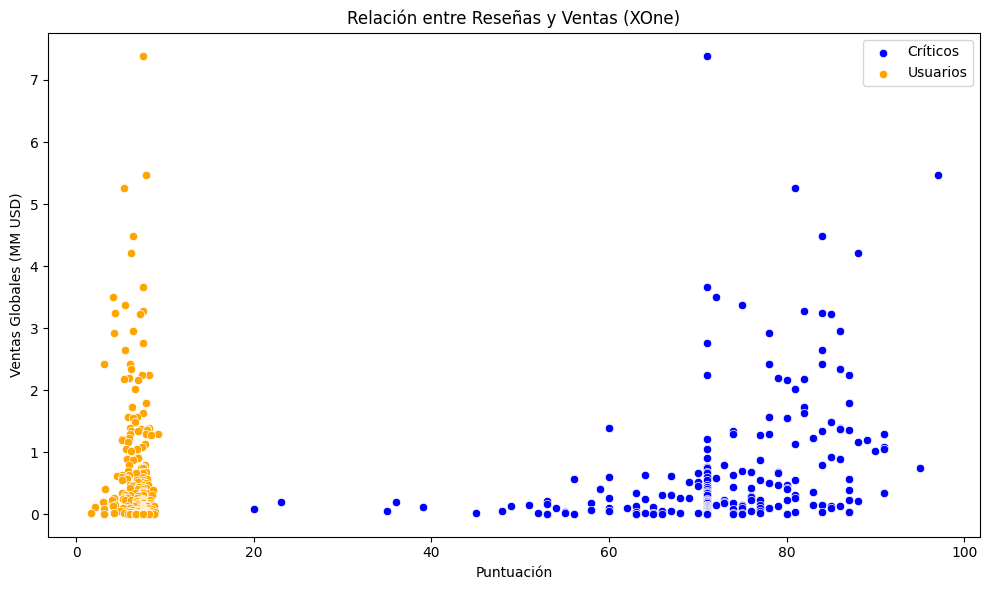

year_of_release   -0.239183
na_sales           0.970433
eu_sales           0.898045
jp_sales           0.452701
other_sales        0.995238
critic_score       0.360451
user_score        -0.105937
total_sales        1.000000
Name: total_sales, dtype: float64


In [19]:
games_XOne = games_2012[games_2012['platform'] == 'XOne']

# Crear el gráfico de dispersión, esta vez se genera en conjunto
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=games_XOne, label='Críticos', color='blue')
sns.scatterplot(x='user_score', y='total_sales', data=games_XOne, label='Usuarios', color='orange')
plt.title('Relación entre Reseñas y Ventas (XOne)')
plt.xlabel('Puntuación')
plt.ylabel('Ventas Globales (MM USD)')
plt.legend()
plt.tight_layout()
plt.show()

#ver correlación de las columnas con total_sales
print(games_XOne.corr()['total_sales'])

Para la plataforma XOne, se observan correlaciones similares a las de la plataforma anterior. Esto sugiere que el critic_score es un indicador más confiable en relación con las ventas. Sin embargo, sería recomendable desarrollar este análisis más a fondo para evaluar cuán efectivo es este indicador en el contexto de todas las plataformas existentes.

### Distribución por género

Con relación al análisis de los juegos por su género, se obtiene la siguiente distribución según su rentabilidad en el mercado:

genre
Action          446.41
Shooter         304.75
Role-Playing    192.80
Sports          181.07
Misc             85.28
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64


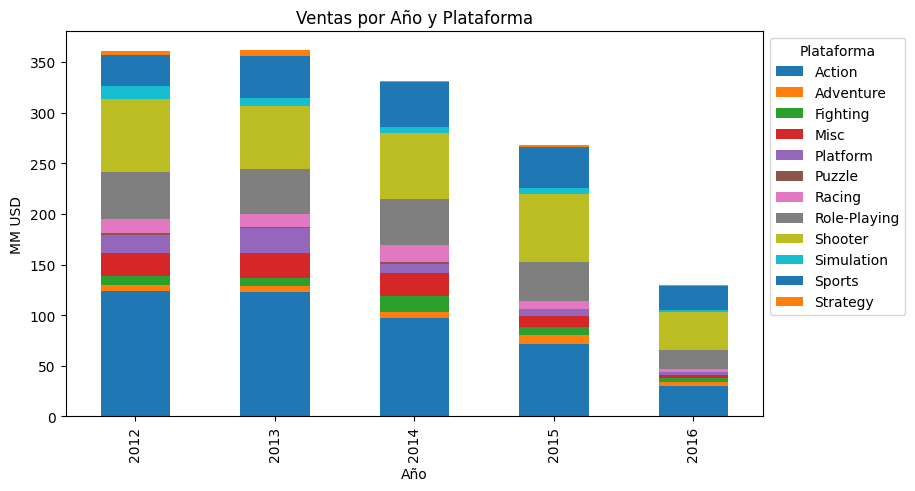

In [20]:
genre_sales = games_2012.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_sales)

#ventas anuales agrupadas por plataforma 
games_gen = games_2012.groupby(['year_of_release', 'genre'])['total_sales'].sum().unstack()
games_gen.plot(kind='bar', stacked=True, figsize=(9, 5))
plt.title('Ventas por Año y Plataforma')
plt.xlabel('Año')
plt.ylabel('MM USD')
plt.legend(title='Plataforma', bbox_to_anchor=(1, 1), loc='upper left')  
plt.show()

Al analizar la distribución general de estos, se observa que los géneros más rentables son claramente Action, Shooter, Role-Playing y Sports. Estos géneros destacan no solo por sus altas ventas totales, sino también por su popularidad sostenida en el mercado a lo largo de los años.
Por otro lado, los géneros con menores ventas, como Strategy y Puzzle, reflejan un interés de los clientes mucho más limitado. Esto sugiere que los géneros de alta venta tienden a atraer a un público más amplio, mientras que los de baja venta son más de nicho y pueden no captar el mismo nivel de atención del consumidor.

Es interesante notar que esta distribución parece ser consistente a lo largo de los años, lo que indica que las preferencias del mercado han sido relativamente estables. Esto podría ser un indicativo de las tendencias duraderas en la industria de los videojuegos, donde los géneros de acción y shooter continúan dominando las ventas.

## Creación de perfiles de usuario

Ya que Ice vende videojuegos por todo el mundo, es fundamental entender las variaciones en las preferencias de los consumidores a nivel regional. Este análisis se centrará en tres regiones clave: América del Norte (NA), Europa (UE) y Japón (JP). Se investigaran las cinco plataformas principales en cada región, así como las variaciones en sus cuotas de mercado. También se exploraran los cinco géneros más populares y se analizarán cómo estas preferencias difieren entre mercados. Finalmente, se evaluara el impacto de las clasificaciones ESRB (rating) en las ventas, proporcionando una visión integral del panorama del mercado de videojuegos a nivel global.

### Top 5 Plataformas

In [21]:
# Top 5 plataformas en NA
na_top_platforms = games_2012.groupby('platform')['na_sales'].sum().nlargest(5)

# Top 5 plataformas en UE
eu_top_platforms = games_2012.groupby('platform')['eu_sales'].sum().nlargest(5)

# Top 5 plataformas en JP
jp_top_platforms = games_2012.groupby('platform')['jp_sales'].sum().nlargest(5)

print("Top 5 plataformas en NA:")
print(na_top_platforms)
print()
print("Top 5 plataformas en UE:")
print(eu_top_platforms)
print()
print("Top 5 plataformas en JP:")
print(jp_top_platforms)


Top 5 plataformas en NA:
platform
X360    140.57
PS4     108.74
PS3     103.74
XOne     93.12
3DS      55.49
Name: na_sales, dtype: float64

Top 5 plataformas en UE:
platform
PS4     141.09
PS3     107.27
X360     74.89
XOne     51.59
3DS      42.83
Name: eu_sales, dtype: float64

Top 5 plataformas en JP:
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


En América del Norte y Europa, las plataformas PS4 y PS3 tienen un rendimiento alto, mientras que en Japón, la 3DS lidera las ventas, esto indica que las preferencias de los consumidores varían significativamente entre regiones, mostrando mas similitudes entre los mercados de NA y UE.

### Top 5 género

In [22]:
# Top 5 genero en NA
na_top_genre = games_2012.groupby('genre')['na_sales'].sum().nlargest(5)

# Top 5 genero en UE
eu_top_genre = games_2012.groupby('genre')['eu_sales'].sum().nlargest(5)

# Top 5 genero en JP
jp_top_genre = games_2012.groupby('genre')['jp_sales'].sum().nlargest(5)

print("Top 5 plataformas en NA:")
print(na_top_genre)
print()
print("Top 5 plataformas en UE:")
print(eu_top_genre)
print()
print("Top 5 plataformas en JP:")
print(jp_top_genre)

Top 5 plataformas en NA:
genre
Action          180.15
Shooter         144.79
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

Top 5 plataformas en UE:
genre
Action          161.70
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

Top 5 plataformas en JP:
genre
Role-Playing    65.44
Action          52.80
Misc            13.10
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


En NA y UE, los géneros más vendidos son Action y Shooter, lo que refleja una preferencia por la juegos de acción y con mayor contenido violento.Por otro lado, en Japón, el género más popular es el Role-Playing, esto sugiere que los gustos de los jugadores son influenciados por la cultura y tendencias locales.


### Análisis en base a rating

In [23]:
# Análisis de clasificaciones ESRB
esrb_sales = games_2012.groupby('rating').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum'
})

print("Ventas por clasificación ESRB:")
print(esrb_sales)

Ventas por clasificación ESRB:
        na_sales  eu_sales  jp_sales
rating                              
E         114.37    113.03     28.33
E10+       77.93     57.25      8.19
M         231.67    194.44     21.20
T          66.02     52.96     26.02


La clasificación "M" tiene un gran impacto en las ventas en NA y UE, lo que indica que los juegos dirigidos a un público más maduro son muy populares en estas regiones. En cambio, Japón muestra una tendencia diferente, con menores ventas para juegos co nesa clasificación, sugiriendo que las clasificaciones ESRB pueden afectar las ventas de manera significativa en función de las normas sociales y culturales de cada territorio.

## Pruebas de hipotésis

Hipotésis N°1: "Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas."
- Hipótesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
- Hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

Esta formulación se basa en el interés de evaluar si existe alguna diferencia en la percepción de los usuarios entre los juegos de estas dos plataformas. 

Hipótesis N°2: "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes."
- Hipótesis nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
- Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

El objetivo en este caso es determinar si las diferencias en las calificaciones reflejan las preferencias de los jugadores por estos géneros.

En ambas las hipótesis nula expresara en que ambas medias son iguales, tal como se vío en el Sprint 5,"En estadística, H₀ suele expresar la idea de que no hay diferencias entre los grupos. Esta hipótesis nula supone que no hay ningún cambio o efecto..En otras palabras, utilizamos la hipótesis nula para asegurarnos de que los valores obtenidos en el experimento no son extremos, sino que caen dentro del rango esperado...".
Dado que las calificaciones de usuarios de Xbox One y PC, así como de los géneros de Acción y Deportes, son muestras independientes, la t test es la prueba más apropiada para ambas hipotésis.
A ambas tambien se les establecera un nivel de significancia (alpha) de 0.05, lo que significa que se aceptara un 5% de probabilidad de rechazar la hipótesis nula cuando sea verdadera.

In [29]:
# Filtrar las calificaciones de usuarios para Xbox One y PC
xbox_one_scores = games_2012_filtered[games_2012_filtered['platform'] == 'XOne']['user_score'].dropna()
pc_scores = games_2012_filtered[games_2012_filtered['platform'] == 'PC']['user_score'].dropna()

var_xbox_one = xbox_one_scores.var()
var_pc = pc_scores.var()
# Mostrar las varianzas
print("Varianza de Xbox One:", var_xbox_one)
print("Varianza de PC:", var_pc)

# Prueba de Levene
levene_stat, levene_pvalue = st.levene(xbox_one_scores, pc_scores)

# Resultado de la prueba de Levene
print('valor p levene:', levene_pvalue)

#al ser la prueba de Levene menor al nivel de significancia de 0.05, se rechaza hipotesis nula con respecto a la igualdad de varianzas
# Prueba t para Xbox One y PC
t_stat_xbox_pc = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)


# Resultado
print("Prueba entre Xbox One y PC:")
print('valor p:', t_stat_xbox_pc.pvalue) 


Varianza de Xbox One: 1.555239518472395
Varianza de PC: 2.3902041960281872

Resultado de la prueba de Levene:
valor p: 0.016272177378864328
Prueba entre Xbox One y PC:
valor p: 0.15660446874482112


In [30]:
# Filtrar las calificaciones de usuarios para los géneros de Acción y Deportes
action_scores = games_2012_filtered[games_2012_filtered['genre'] == 'Action']['user_score'].dropna()
sports_scores = games_2012_filtered[games_2012_filtered['genre'] == 'Sports']['user_score'].dropna()

var_action = action_scores.var()
var_sports = sports_scores.var()
# Mostrar las varianzas
print("Varianza de puntación juegos de acción:", var_action)
print("Varianza de puntación juegos de deportes:", var_sports)

# Prueba de Levene
levene_stat, levene_pvalue = st.levene(action_scores, sports_scores)

# Resultado de la prueba de Levene
print('valor p levene:', levene_pvalue)

#al ser la prueba de Levene menor al nivel de significancia de 0.05, se rechaza hipotesis nula con respecto a la igualdad de varianzas
# Prueba t para Acción y Deportes
t_stat_action_sports = st.ttest_ind(action_scores, sports_scores, equal_var=False)

#Resultado
print("Prueba entre Acción y Deportes:")
print('valor p:', t_stat_action_sports.pvalue)


Varianza de puntación juegos de acción: 1.0387778792451692
Varianza de puntación juegos de deportes: 3.1851277777777782
valor p levene: 2.1367552710246107e-29
Prueba entre Acción y Deportes:
valor p: 5.7292421557194e-16


In [32]:
# Decisiones
alpha = 0.05
print("Decisiones:")
if t_stat_xbox_pc.pvalue < alpha:
    print("Se rechaza la hipótesis nula: Las calificaciones promedio de Xbox One y PC son diferentes.")
else:
    print("No se rechaza la hipótesis nula: Las calificaciones promedio de Xbox One y PC son iguales.")

if t_stat_action_sports.pvalue < alpha:
    print("Se rechaza la hipótesis nula: Las calificaciones promedio de Acción y Deportes son diferentes.")
else:
    print("No se rechaza la hipótesis nula: Las calificaciones promedio de Acción y Deportes son iguales.")

Decisiones:
No se rechaza la hipótesis nula: Las calificaciones promedio de Xbox One y PC son iguales.
Se rechaza la hipótesis nula: Las calificaciones promedio de Acción y Deportes son diferentes.


Para la 1ra hipótesis, como el valor p es mayor que α, no podemos rechazar la hipótesis nula, esto indica que no hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes.

En cambio, en la 2da, dado que el valor p es mucho menor que α, rechazamos la hipótesis nula, esto sugiere que hay una diferencia significativa en las calificaciones promedio de usuarios entre estos dos géneros.

## Conclusión general del proyecto

El análisis de los datos de ventas y reseñas de videojuegos a partir de 2012 proporciona una visión integral sobre el mercado y las preferencias de los consumidores en la actualidad, lo que nos ayuda comprender mejor nuestro entorno y poder generar una mejor toma de decisiones con respecto a los planes de Ice para el año que se avecina. A través de cinco puntos clave, se han abordado diversos aspectos que permiten entender mejor las dinámicas de la industria de los videojuegos:

Análisis de Ventas por Plataforma y Género: Se identificó que plataformas como PS4, XOne y 3DS han mostrado un crecimiento en sus ciclos de vida, mientras que las más antiguas como PS3 y X360 están en declive. En cuanto a géneros, Action y Shooter son los más rentables, sugiriendo que las preferencias del consumidor son relativamente estables y se concentran en juegos de alta acción.

Relación entre Reseñas y Ventas: Se observó que las calificaciones de críticos tienen una correlación positiva con las ventas, mientras que las calificaciones de los usuarios no mostraron una relación significativa. Esto implica que las opiniones de los críticos podrían ser más influyentes en las decisiones de compra de los consumidores.

Variación Regional en Preferencias: El análisis regional reveló diferencias significativas en las plataformas y géneros más populares entre América del Norte, Europa y Japón. Por ejemplo, la 3DS lidera en Japón, mientras que Action y Shooter dominan en NA y UE. Esto sugiere que las estrategias de marketing deben adaptarse a las particularidades culturales y de consumo de cada región.

Impacto de las Clasificaciones ESRB: Las clasificaciones de los videojuegos también influyen en las ventas, con un marcado interés en juegos calificados como "M" en América del Norte y Europa, mientras que en Japón, estas calificaciones tienen menor impacto. Esto refleja diferencias en normas sociales y culturales respecto a los contenidos de los videojuegos.

Pruebas de Hipótesis: Las pruebas de hipótesis confirmaron que no hay diferencias significativas en las calificaciones de usuarios entre Xbox One y PC, mientras que sí se detectaron diferencias notables entre las calificaciones de los géneros de Acción y Deportes. Esto destaca la relevancia de las preferencias de género en la experiencia del usuario y su evaluación de los juegos.

En conjunto, estos análisis no solo proporcionan información valiosa sobre las tendencias actuales del mercado de videojuegos, sino que también ofrecen una base sólida para la formulación de estrategias de marketing y ventas para futuras campañas de Ice en el futuro.



